# <center> Сегментация клиентов онлайн магазина подарков

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе.

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.




## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.



Импорт базовых библиотек:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.pipeline import Pipeline

import warnings

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True 

## 1. Знакомство со структурой данных

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Познакомьтесь с исходными данными поближе:

* Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
* Узнайте, сколько уникальных клиентов совершали транзакции в указанный период.
* Узнайте, из каких стран совершались транзакции.
* Исследуйте данные на наличие пропусков и дубликатов.
* Переведите столбцы в корректные форматы (например, даты в формат datetime).

In [2]:
# Прочитаем наш дата-фрейм и узнаем его размерность
data = pd.read_csv(
    "data/data.csv",
    encoding="ISO-8859-1",
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [3]:
# Теперь посмотрим на временной интервал данных
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print('Date interval {} to {}'.format(data['InvoiceDate'].dt.date.min(), data['InvoiceDate'].dt.date.max()))

Date interval 2010-12-01 to 2011-12-09


### Как видим данные охватывают чуть больше года.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


#### Лишь в признаках Description и CustomerID содержаться пропуски.

In [5]:
data.describe()

,Quantity,InvoiceDate,UnitPrice
count,541909.000000,541909,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 11:34:00,1.250000
50%,3.000000,2011-07-19 17:17:00,2.080000
75%,10.000000,2011-10-19 11:27:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,218.081158,NaN,96.759853


#### Можно видеть, что для признаков Quantity и UnitPrice существуют отрицательные минимальные значения.

In [6]:
# Посмотрим на количество пропусков по столбцам
data[['Description', 'CustomerID']].isnull().sum()

Description      1454
CustomerID     135080
dtype: int64

#### Как видим выше в столбце Description 1454 пропуска и 135080 пропусков в CustomerID.

In [7]:
# Выведем на экран количество пропусков процентах
data[['Description', 'CustomerID']].isnull().mean()*100

Description     0.268311
CustomerID     24.926694
dtype: float64

#### Количество пропусков для признака Description меньше одного процента. Практически четверть всех значений (24.93%) в столбце CustomerID являются пропусками, что очень много.

In [8]:
print('Количество уникальных клиентов, совершивших транзакции в указанный период, составляет: {}'.format(data['CustomerID'].nunique()))
print()
print('Список топ стран, в которых живут клиенты с наибольшим количеством заказов: ')
print('_'* 30)
print(data['Country'].value_counts())

Количество уникальных клиентов, совершивших транзакции в указанный период, составляет: 4372

Список топ стран, в которых живут клиенты с наибольшим количеством заказов: 
______________________________
Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland         

In [9]:
# Проверим наш датасет на наличие дубликатов
dupl_columns = list(data.columns)

mask = data.duplicated(subset=dupl_columns)
data_duplicated = data[mask]
print(f'Число найденных дубликатов: {data_duplicated.shape[0]}')

Число найденных дубликатов: 5268


## 2. Преобразование, очистка и анализ данных

### 2.1. Преобразование и очистка данных о транзакциях

#### 2.1.1 Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалите их из данных.

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID, тогда пропуски в столбце Description удаляются автоматически.


In [10]:
# Удалим все пропуски в записях и обнулим счетчик
new_data = data.dropna(ignore_index=True)
print(f'Число удаленных значений: {data.shape[0] - new_data.shape[0]}')

Число удаленных значений: 135080


#### Число удаленных значений совпадает с количеством пропусков для признака CustomerID, значит пропуски для признака Description были в тех же записях.

#### 2.1.2. Дубликаты

Проверьте данные на наличие дубликатов. Удалите их из данных.


In [11]:
# Удалим все найденные дубликаты и обнулим счетчик
data_deduppled = new_data.drop_duplicates(ignore_index=True)
data = data_deduppled.copy()
print(f'Число оставшихся строк: {data.shape[0]}')
print(f'Число удаленных дубликатов: {new_data.shape[0] - data.shape[0]}')

Число оставшихся строк: 401604
Число удаленных дубликатов: 5225


#### 2.1.3. Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [12]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

Создайте в ваших данных о транзакциях признак `QuantityCanceled`. Этот признак будет указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. Для транзакций, для которых не было возвратов, признак будет равен 0. Для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

В качестве вспомогательного инструмента мы подготовили для вас функцию `get_quantity_canceled()`. Эта функция принимает на вход таблицу с транзакциями и возвращает объект `Series` — столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции. Если транзакция не имеет контрагента, этот признак помечается как `NaN`.

Отметим, что эта функция не учитывает сложный случай, когда количество отменённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом). При желании вы можете самостоятельно модифицировать функцию для предобработки, чтобы учесть этот пограничный случай.

*Осторожно! Поиск отменённых транзакций занимает много времени из-за большого количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от мощности компьютера.*

In [13]:
def get_quantity_canceled(data):
    
    """Функция для создания признака количества отменённых заказов.
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии товара для кажой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, данный признак помечается как NaN.

    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """
    
    # Инициализируем нулями Series той же длины, что и столбцы таблицы
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    
    for index, col in negative_quantity.iterrows():
        
        # Создаём DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) &
                       (data['InvoiceDate'] < col['InvoiceDate']) &
                       (data['Quantity'] > 0)].copy()
        
        # Транзация-возврат не имеет контрагента — ничего не делаем
        if (df_test.shape[0] == 0):
            # Помечаем столбец как пропуск
            quantity_canceled.loc[index] = np.nan
        # Транзакция-возврат имеет ровно одного контрагента
        
        # Добавляем количество отменённого товара в столбец QuantityCanceled
        elif (df_test.shape[0] == 1):
            
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']
            
        # Транзакция-возврат имеет несколько контрагентов
        # Задаём количество отменённого товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара больше количества товаров в транзакции-возврате.
        elif (df_test.shape[0] > 1):
            
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)
            
            # Немного модифицируем функцию для случая, когда клиент сделал несколько
            # заказов одного и того же товара, а потом оформил возврат на все товары разом.
            # Этот случай как раз можем проверить условием.
            if df_test['Quantity'].sum() == -col['Quantity']:
                
                quantity_canceled.loc[df_test.index[df_test.shape[0]-1]] = -col['Quantity']
            
            else:
                
                for ind, val in df_test.iterrows():
                    
                    if val['Quantity'] < -col['Quantity']:
                        
                        continue
                    
                    quantity_canceled.loc[ind] = -col['Quantity']
                    
                    break
                
    return quantity_canceled

data['QuantityCanceled'] = get_quantity_canceled(data)

*Осторожно! Поиск отмененных транзакций занимает достаточно длительное время из-за количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от компьютера.*

Узнайте, сколько транзакций в данных не имеют контрагентов, и, если их количество невелико, удалите их из данных.

Когда вы разобрались с возвратами, удалите транзакции с отрицательным количеством товара — они нам больше не нужны.



In [14]:
# Узнаем сколько транзакций в данных, которые не имеют контрагентов
print('Number of transactions without counterparties: {}'.format(data['QuantityCanceled'].isnull().sum()))
print('The percentage of transactions without counterparties: {:.2}'.format(data['QuantityCanceled'].isnull().mean()*100))
print('Number rows of dataframe : {}'.format(data.shape[0]))

Number of transactions without counterparties: 1303
The percentage of transactions without counterparties: 0.32
Number rows of dataframe : 401604


#### Процент таких транзакций меньше одного процент, поэтому может их удалить.

In [15]:
data.dropna(inplace=True, ignore_index=True) # Обнулим счетчик
print('Number rows of new dataframe : {}'.format(data.shape[0]))
display(data)

Number rows of new dataframe : 400301


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
400296,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,0.0
400297,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,0.0
400298,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,0.0
400299,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,0.0


In [16]:
# Оставим все транзакции, у которых значения количества товара неотрицательное
data = data[data['Quantity'] >= 0]

# Обнулим счетчик
data.reset_index(inplace=True, drop=True)

# Для удобства в дальнейшем 
new_data = data.copy()

print('Number rows of new dataframe: {}'.format(new_data.shape[0]))
display(new_data)

Number rows of new dataframe: 392732


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
392727,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,0.0
392728,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,0.0
392729,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,0.0
392730,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,0.0


#### 2.1.4. Специализированные транзакции

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

**Подсказка.** В качестве шаблона для поиска используйте строку '^[a-zA-Z]+'.

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы, DOTCOM POSTAGE - интернет расходы, MANUAL - расходы на руководство, PADS TO MATCH ALL CUSHIONS - подкладка под подушку.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы.

In [17]:
# Вытащим из столбца StockCode все обозначения, которые начинаются из букв согласно шаблону
new_data['Type_transaction'] = new_data['StockCode'].str.extract(r'^([a-zA-Z]+)')

print('Total count of special transactions types: {} or {:.2}%'.format(new_data['Type_transaction'].value_counts().values.sum(), 
                                                                      (new_data['Type_transaction'].value_counts().values.sum())*100/(new_data.shape[0])))

new_data['Type_transaction'].value_counts()

Total count of special transactions types: 1549 or 0.39%


Type_transaction
POST    1099
M        285
C        133
DOT       16
BANK      12
PADS       4
Name: count, dtype: int64

In [18]:
# Удалим все специальные транзакции из таблицы за ненадобностью
new_data = new_data.drop(axis=0, index=new_data[(new_data['Type_transaction']=='POST')|(new_data['Type_transaction']=='M')|
                                                (new_data['Type_transaction']=='C')|(new_data['Type_transaction']=='DOT')|
                                                (new_data['Type_transaction']=='BANK')|(new_data['Type_transaction']=='PADS')].index)

# Теперь можем удалить ненужный признак Type_transaction
new_data = new_data.drop(axis=1, columns=['Type_transaction'])

# Для проверки посмотрим какое количество строк удалили
print('Number rows of new dataframe: {}'.format(new_data.shape[0]))

Number rows of new dataframe: 391183


#### 2.1.5. Транзакции с товарами без стоимости

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [ ]:
print('Number of transactions with zero-cost items: {}'.format(new_data[new_data['UnitPrice']==0].shape[0]))

# Удалим все транзакции с нулевой стоимостью товара
new_data = new_data.drop(axis=0, index=new_data[new_data['UnitPrice']==0].index)

print('Number rows of new dataframe: {}'.format(new_data.shape[0]))

Number of transactions with zero-cost items: 33
Number rows of new dataframe: 391150


#### 2.1.6. Общая стоимость товаров в транзакции

Добавьте в ваш датасет общую цену заказа (TotalPrice). Она рассчитывается как:

 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Этот признак впоследствии поможет вам рассчитать покупательскую способность каждого из клиентов.

In [ ]:
# Создадим новый признак TotalPrice
new_data['TotalPrice'] = new_data['UnitPrice']*(new_data['Quantity'] - new_data['QuantityCanceled'])

# Обнулим счетчик значений
new_data.reset_index(inplace=True, drop=True)

display(new_data)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
...,...,...,...,...,...,...,...,...,...,...
391145,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,0.0,10.20
391146,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,0.0,12.60
391147,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,0.0,16.60
391148,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,0.0,16.60


In [21]:
# Cоздадим новые признаки Year, Month, Day, Day_of_week, Hour, Quarter, Date
new_data['Year'] = new_data['InvoiceDate'].dt.year
new_data['Month'] = new_data['InvoiceDate'].dt.month
new_data['Day'] = new_data['InvoiceDate'].dt.day
new_data['Day_of_week'] = new_data['InvoiceDate'].dt.day_of_week
new_data['Hour'] = new_data['InvoiceDate'].dt.hour
new_data['Quarter'] = new_data['InvoiceDate'].dt.quarter
new_data['Date'] = new_data['InvoiceDate'].dt.date

# Преобразуем признаки в цифровой формат
new_data['InvoiceNo'] = new_data['InvoiceNo'].astype('int64')
new_data['CustomerID'] = new_data['CustomerID'].astype('int64')

### 2.2. Разведывательный анализ

После предобработки исходных данных произведите разведывательный анализ и исследуйте транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)?

**Примечание.** Вы можете сформулировать и другие вопросы. Главная цель — извлечь максимум понятной информации из исходных данных.

Свои рассуждения сопроводите графиками и диаграммами.



In [22]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391150 entries, 0 to 391149
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         391150 non-null  int64         
 1   StockCode         391150 non-null  object        
 2   Description       391150 non-null  object        
 3   Quantity          391150 non-null  int64         
 4   InvoiceDate       391150 non-null  datetime64[ns]
 5   UnitPrice         391150 non-null  float64       
 6   CustomerID        391150 non-null  int64         
 7   Country           391150 non-null  object        
 8   QuantityCanceled  391150 non-null  float64       
 9   TotalPrice        391150 non-null  float64       
 10  Year              391150 non-null  int32         
 11  Month             391150 non-null  int32         
 12  Day               391150 non-null  int32         
 13  Day_of_week       391150 non-null  int32         
 14  Hour

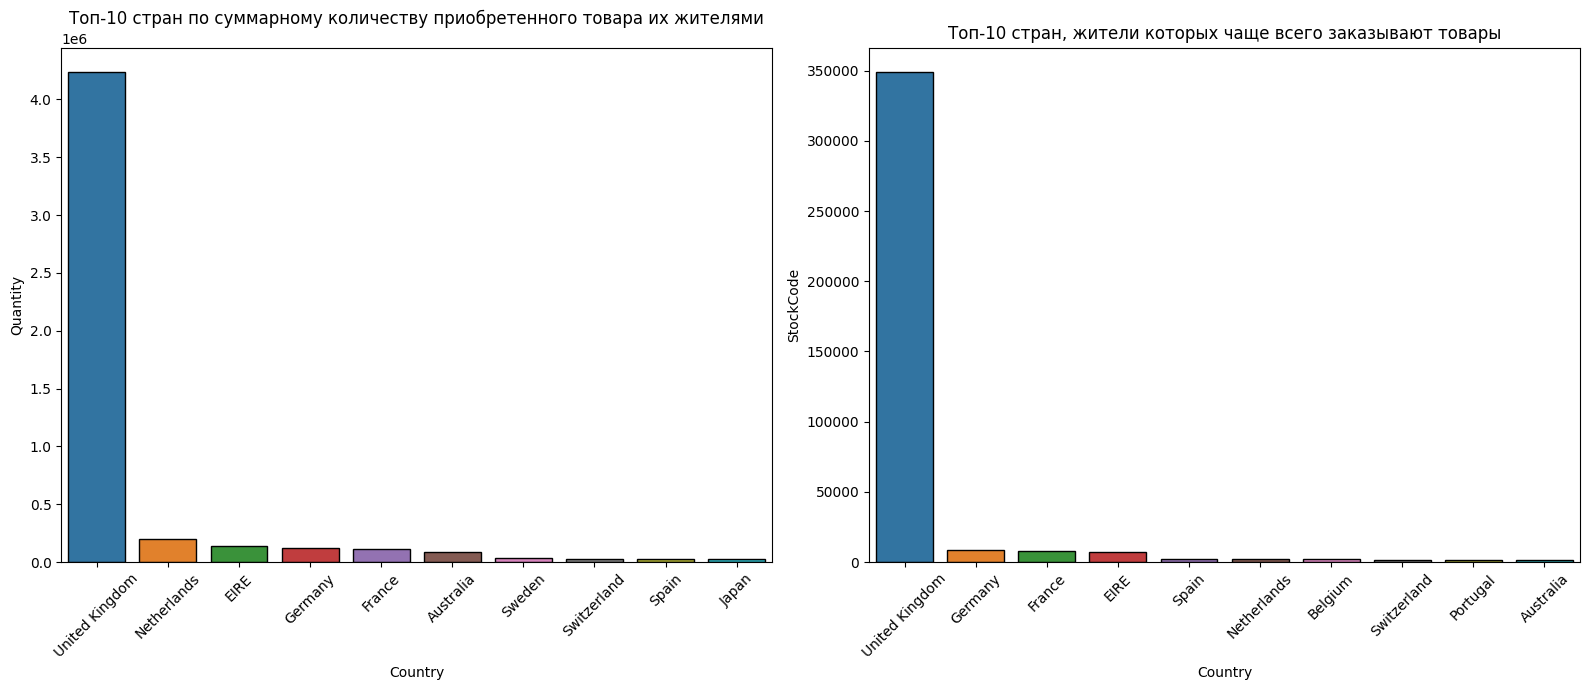

In [23]:
# Сгруппируем страны по суммарному количеству товара и запишем результат в датафрейм
df_qua = new_data.groupby('Country')['Quantity'].sum().to_frame()
# Обнулим индексацию
df_qua.reset_index(inplace=True)
# Сгруппируем страны по общему количеству заказов и запишем результат в датафрейм
df_sc = new_data.groupby('Country')['StockCode'].count().to_frame()
# Обнулим индексацию
df_sc.reset_index(inplace=True)
# Объединим два датафрейма по общему столбцу 'Country'
merged_bar_data = df_qua.merge(df_sc, on='Country', how='inner')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))

# Построим первую столбчатую диаграмму
sns.barplot(
    data=merged_bar_data.sort_values(by='Quantity', ascending=False).head(10),
    x='Country',
    y='Quantity',
    hue='Country',
    ax=axes[0]
)
axes[0].set_title('Топ-10 стран по суммарному количеству приобретенного товара их жителями')
axes[0].tick_params(axis='x', rotation=45)

# Построим вторую столбчатую диаграмму
sns.barplot(
    data=merged_bar_data.sort_values(by='StockCode', ascending=False).head(10),
    x='Country',
    y='StockCode',
    hue='Country',
    ax=axes[1]
)
axes[1].set_title('Топ-10 стран, жители которых чаще всего заказывают товары')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

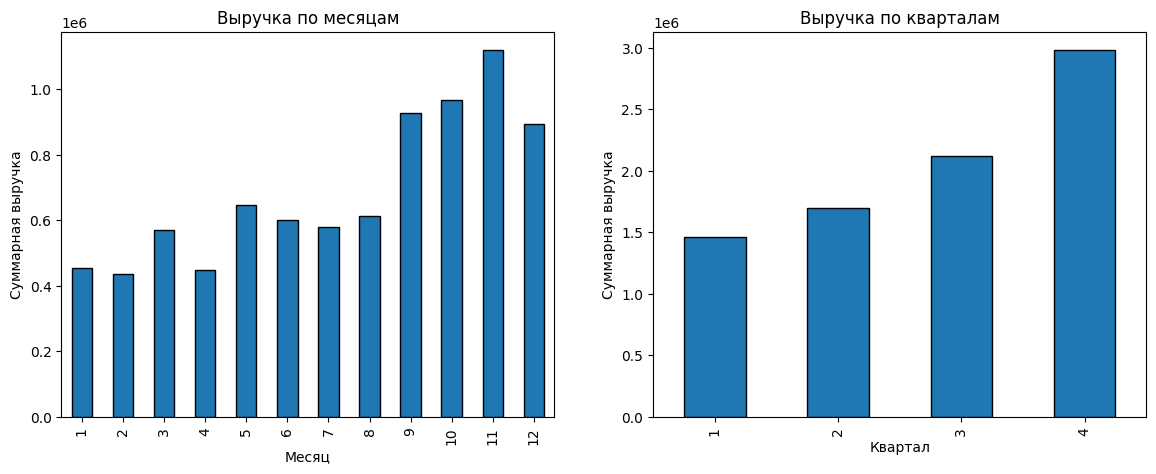

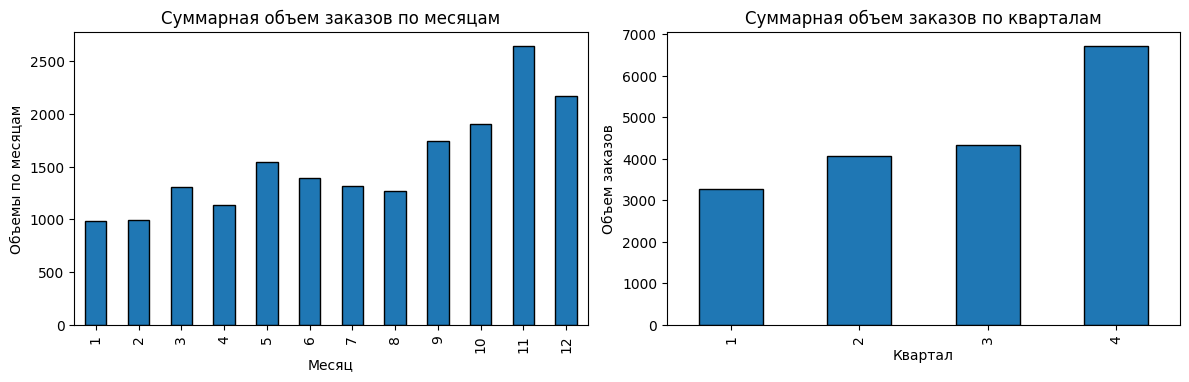

In [24]:
# Группировка по месяцам
monthly_sales = new_data.groupby('Month')['TotalPrice'].sum()
monthly_orders = new_data.groupby('Month')['InvoiceNo'].nunique()

# Группировка по кварталам
quarterly_sales = new_data.groupby('Quarter')['TotalPrice'].sum()
quarterly_orders = new_data.groupby('Quarter')['InvoiceNo'].nunique()

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
monthly_sales.plot(kind='bar')
plt.title('Выручка по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Суммарная выручка')

plt.subplot(1,2,2)
quarterly_sales.plot(kind='bar')
plt.title('Выручка по кварталам')
plt.xlabel('Квартал')
plt.ylabel('Суммарная выручка')

plt.figure(figsize=(12,7))
plt.subplot(2,2,1)
monthly_orders.plot(kind='bar')
plt.title('Суммарная объем заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Объемы по месяцам')

plt.subplot(2,2,2)
quarterly_orders.plot(kind='bar')
plt.title('Суммарная объем заказов по кварталам')
plt.xlabel('Квартал')
plt.ylabel('Объем заказов')

plt.tight_layout()
plt.show()

#### Исходя из диаграмм можно сказать, что больше всего по объему и суммарной выручке приходиться на вторую половину и конец года. Однозначно утвеждать, что существует какая-то сезонность нельзя. Для однозначного ответа нужны данные за несколько лет. Теперь можем узнать страны, которые приносят наибольшую выручку в самые успешное в плане продаж время.

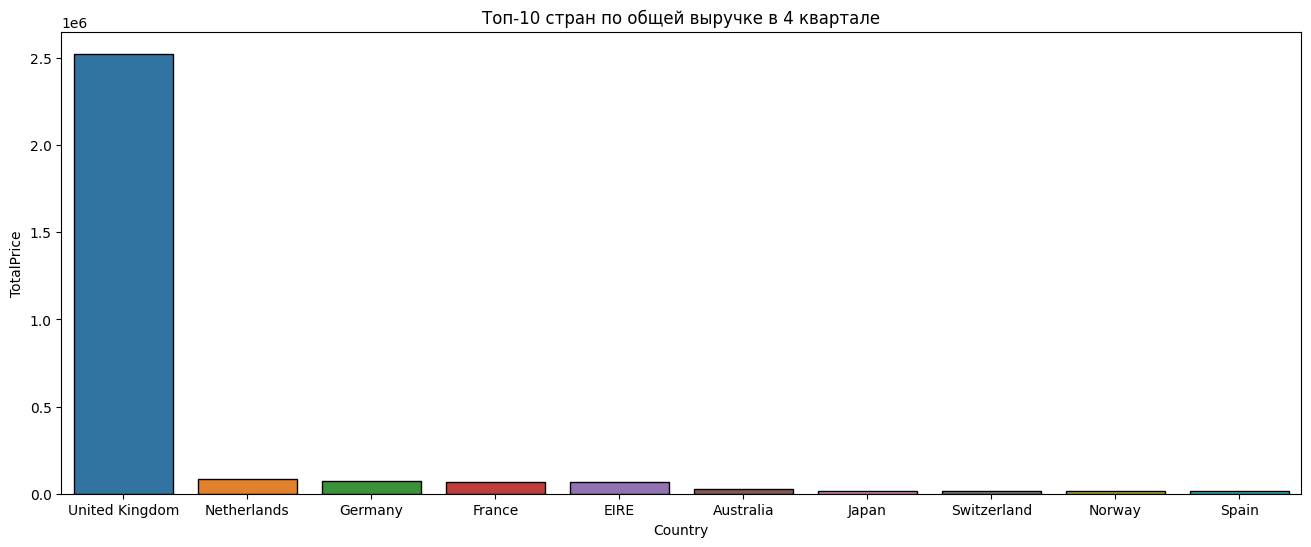

In [ ]:
# Cгруппируем страны по суммарной выручке за 4 квартал в датафрейм
quarterly_sales_for_country  = new_data[new_data['Quarter']==4].groupby('Country')['TotalPrice'].sum().to_frame()

# Обнулим индексацию
quarterly_sales_for_country.reset_index(inplace=True)

# Нарисуем столбчатую диаграмму
plt.figure(figsize=(16, 6))
barplot = sns.barplot(
    data=quarterly_sales_for_country.sort_values(by='TotalPrice', ascending=False).head(10),
    x='Country',
    y='TotalPrice',
    hue='Country'
    )
barplot.set_title('Топ-10 стран по общей выручке в 4 квартале');

plt.show()

#### Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.

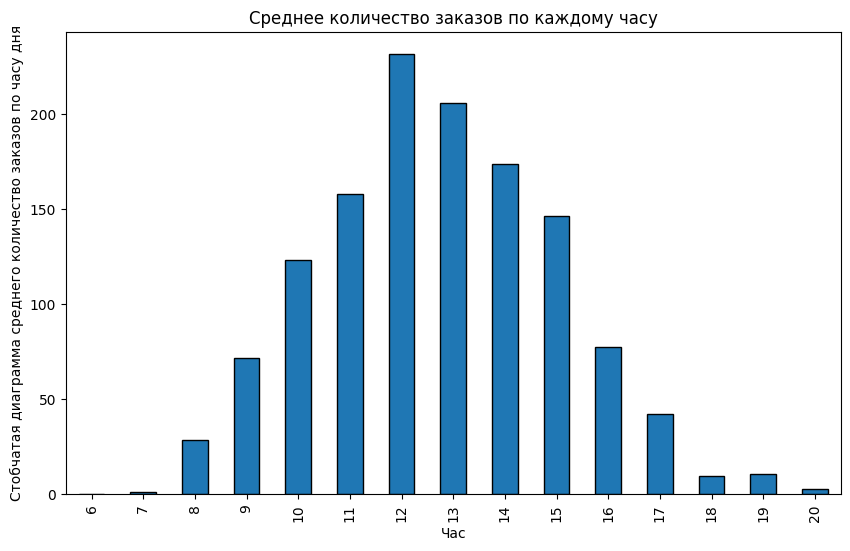

In [26]:
# Сгруппируем данные
bar_data = new_data.pivot_table(
    values='InvoiceNo',
    index='Date',
    columns='Hour',
    fill_value=0,
    aggfunc='count'
)

# Среднее количество заказов по каждому часу за весь период
mean_orders_per_hour = bar_data.mean(axis=0)
plt.figure(figsize=(10, 6))
mean_orders_per_hour.plot(kind='bar')
plt.title('Среднее количество заказов по каждому часу')
plt.xlabel('Час')
plt.ylabel('Стобчатая диаграмма среднего количество заказов по часу дня')
plt.show()

#### Как видим максимальное количество заказов в течение дня в среднем приходится на середину дня. 

### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM.

<center> <img src=https://miro.medium.com/max/1400/1*uYQjy9SUjW7iWHc2gGanQQ.png align="right" width="400"/> </center>

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов.

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учётом возвратов).

Когда вы рассчитаете все характеристики, не забудьте дать столбцам результирующей таблицы соответствующие названия.

In [ ]:
# Переводим в формат datetime дату, на 1 день "старше" максимальной в датасете
date_t0 = pd.to_datetime('2011-12-10')

# Группируем строки по CustomerID
groupby = new_data.groupby("CustomerID")

# Для сгруппированных строк считаем всё необходимое и создаём таблицу RFM
RFM_data = pd.concat(
    [
        (date_t0 - groupby.max()["InvoiceDate"]).dt.days.rename("Recency"),
        groupby["InvoiceNo"].nunique().rename("Frequency"),
        groupby["TotalPrice"].sum().rename("Monetary"),
    ],
    axis=1,
)

RFM_data.head(5)

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,0.00
12347,2,7,4310.00
12348,75,4,1437.24
12349,18,1,1457.55
12350,310,1,294.40


После того как вы подготовите RFM-таблицу, визуализируйте каждую из трёх компонент, например, в виде коробчатых диаграмм (boxplot). Вы получите примерно следующие результаты (графики могут отличаться в зависимости от того, как вы выполните предобработку данных):

In [28]:
# Постоим boxplot диаграммы для всех признаков
boxes = [px.box(RFM_data, x=column) for column in RFM_data.columns]

fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
fig.show()

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


In [29]:
# Выбираем колонки для фильтрации
columns_to_filter = ['Frequency', 'Monetary']
#  Находим 95-й процентиль для каждого признака
quantiles = RFM_data[columns_to_filter].quantile(0.95)

#  Фильтруем датафрейм по условию
RFM_filtered = RFM_data[
    (RFM_data['Frequency'] <= quantiles['Frequency']) &
    (RFM_data['Monetary'] <= quantiles['Monetary'])
]

display(RFM_filtered)

print('The number of filtered rows: {}'.format(RFM_data.shape[0] - RFM_filtered.shape[0]))

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,0.00
12347,2,7,4310.00
12348,75,4,1437.24
12349,18,1,1457.55
12350,310,1,294.40
...,...,...,...
18278,73,1,173.90
18280,277,1,180.60
18281,180,1,80.82


The number of filtered rows: 290


In [30]:
# Еще раз строим boxplot диаграммы для всех признаков на отфильтрованных данных
boxes = [px.box(RFM_filtered, x=column) for column in RFM_filtered.columns]

fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
fig.show()

## 3. Моделирование и оценка качества моделей

### 3.1. Кластеризация на основе RFM-характеристик

Чтобы результаты кластеризации было удобнее интерпретировать, вы можете уменьшить размерность исходных признаков до двух компонент.

**Подсказка.** Чтобы методы понижения размерности работали стабильно, данные необходимо стандартизировать/нормализовать. Для удобства оберните эти шаги по предобработке данных в pipeline.

Произведите предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков с помощью известных вам методов (используйте минимум три метода).

Подберите оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелеватно для маркетинга).

Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Создадим пайплайн для стандартизации данных и понизим размерность с помощью метода PCA
pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
pipeline.fit(RFM_filtered)
principalComponents = pipeline.transform(RFM_filtered)

# Преобразуем полученные компоненты в датафрейм с именами столбцов PC1 и PC2
principalComponents = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

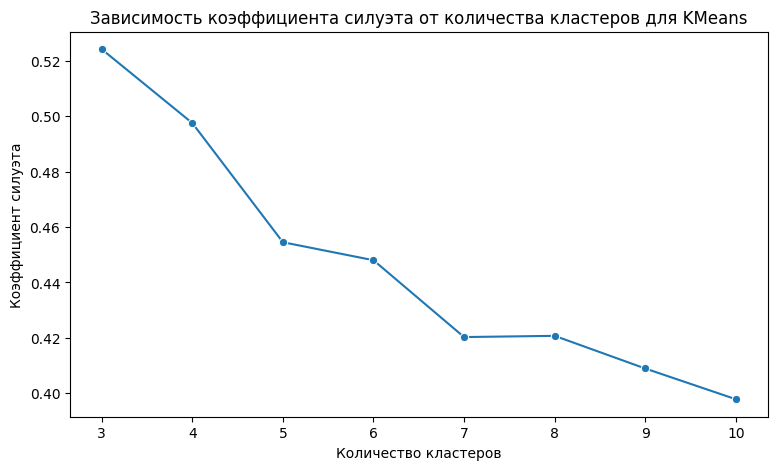

In [32]:
# Напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, Clastering_Method, X=principalComponents):
    
    """Функция для подсчета коэффициента силуэта для заданного количества кластеров. Функция принимает на вход количество кластеров и метод кластеризации."""
    
    Clastering_Method.fit(X)
# Подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, Clastering_Method.predict(X))
    
    return silhouette

# Создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# Выберем нужные данные 
X = principalComponents

# Подберем оптимальное количество кластеров с помощью метода силуэта для KMeans
for cluster_num in range(3, 11):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, KMeans(n_clusters=cluster_num, random_state=42)))
    silhouette_res["cluster"].append(cluster_num)
    
# Сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

plt.figure(figsize=(9, 5))
# Визуализируем зависимость значения инерции от количества кластеров
ax = sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker="o")
ax.set_title("Зависимость коэффициента силуэта от количества кластеров для KMeans")
plt.xlabel("Количество кластеров")
plt.ylabel("Коэффициент силуэта")
plt.show()

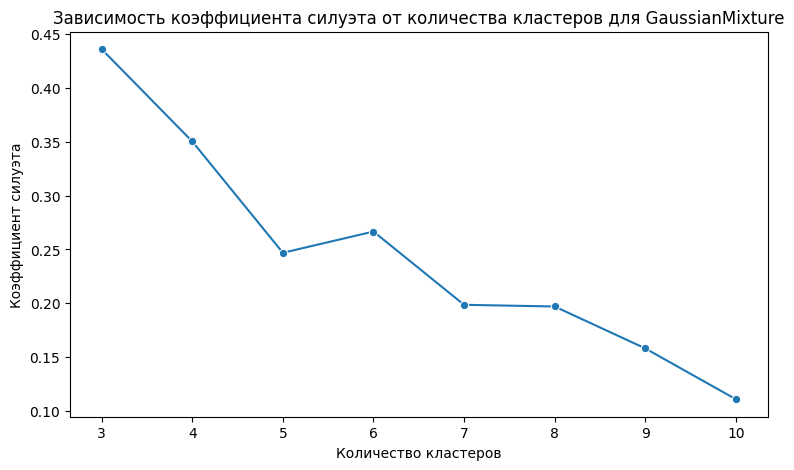

In [33]:
# Cоздадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# Подберем оптимальное количество кластеров с помощью метода силуэта для GaussianMixture
for cluster_num in range(3, 11):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, GaussianMixture(n_components=cluster_num, random_state=42)))
    silhouette_res["cluster"].append(cluster_num)
    
# Cохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

plt.figure(figsize=(9, 5))
# Визуализируем зависимость значения инерции от количества кластеров
ax = sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker="o")
ax.set_title("Зависимость коэффициента силуэта от количества кластеров для GaussianMixture")
plt.xlabel("Количество кластеров")
plt.ylabel("Коэффициент силуэта")
plt.show()

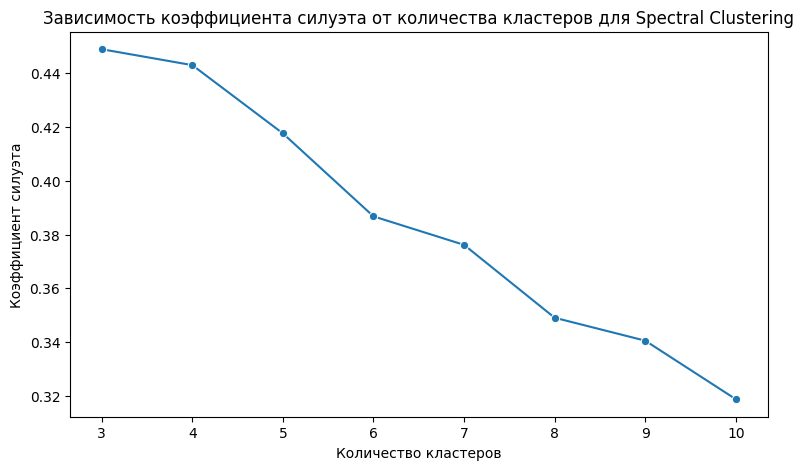

In [34]:
# Изменим функцию get_silhouette для работы с другим методом кластеризации, поскольку SpectralClustering не имеет метода predict, а использует labels_ для получения меток классов
def get_silhouette(cluster_num, Clastering_Method, X=principalComponents):
    
    """"Функция для подсчета коэффициента силуэта для заданного количества кластеров. Функция принимает на вход количество кластеров и метод кластеризации."""
    
    Clastering_Method.fit(X)
    # Подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, Clastering_Method.labels_)
    
    return silhouette

# Cоздадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# Подберем оптимальное количество кластеров с помощью метода силуэта для Spectral Clustering
for cluster_num in range(3, 11):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, SpectralClustering(n_clusters=cluster_num, random_state=42)))
    silhouette_res["cluster"].append(cluster_num)
    
# Cохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

plt.figure(figsize=(9, 5))
# Визуализируем зависимость значения инерции от количества кластеров
ax = sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker="o")
ax.set_title("Зависимость коэффициента силуэта от количества кластеров для Spectral Clustering")
plt.xlabel("Количество кластеров")
plt.ylabel("Коэффициент силуэта")
plt.show()

#### Как видно из трех построенных графиков наилучшим количеством кластеров будет 3 для всех методов кластеризации. Самым высоким коэффициентом кластеризации обладает метод KMeans. Выбираем его и кластеризуем RFM таблицу метками.

In [35]:
# Стандартизируем RFM таблицу
scaler = preprocessing.StandardScaler()
scaler.fit(RFM_filtered)                           
data_scaled = scaler.transform(RFM_filtered)

# Создадим KMeans кластеризатор для 3 кластеров
k_means = KMeans(n_clusters=3, random_state=42)

# Обучаем модель на стандартизированных данных
k_means.fit(data_scaled)
# Получаем столбец с метраками кластеризации
labels = pd.DataFrame({'labels': k_means.labels_})
# Чтобы корректно склеить два датафрейма по индексу, установим индексы для меток кластеров
labels.index = list(RFM_filtered.index)

# Додавим метки кластеров к RFM таблице
RFM_table = pd.concat([RFM_filtered, labels], axis=1)
# Для удобства переномеруем один из кластеров
RFM_table['labels'] = RFM_table['labels'].replace({0:3})
# Для удобства в дальнейшем преобразуем из целочисленного в строчный формат
RFM_table['labels'] = RFM_table['labels'].astype(str)

display(RFM_table)

,Recency,Frequency,Monetary,labels
12346,325,1,0.00,3
12347,2,7,4310.00,1
12348,75,4,1437.24,2
12349,18,1,1457.55,2
12350,310,1,294.40,3
...,...,...,...,...
18278,73,1,173.90,2
18280,277,1,180.60,3
18281,180,1,80.82,3
18282,7,2,176.60,2


### 3.2. Интерпретация результатов кластеризации

Перейдём к интерпретации полученных кластеров.

#### 3.2.1. Визуализация кластеров

Визуализируйте результаты в виде 3D-диаграммы с осями Recency, Frequency и Monetary. Проанализируйте полученную диаграмму и попробуйте понять, какие кластеры у вас получились.

In [36]:
# Строим график
fig = px.scatter_3d(
    data_frame=RFM_table,
    x = 'Recency',
    y = 'Frequency', 
    z = 'Monetary',
    color='labels', 
    width=1000,
    height=700,
    title="3D Scatter Plot of RFM Segmentation"
)

# Отображаем график
fig.show();

#### Данные разделены на три кластера. Первый кластер будем считать самым лучшим с точки зрения продаж: это недавние покупки, максимальные значения по потраченным деньгам и максимальные значения по общему количеству покупок. Второй кластер - это второй по значимости по всем показателям RFM, то есть все три значения в этом кластере лишь начальные и небольшие. Третий кластер похож на второй, но различается лишь тем, что для у всех клиентов последняя покупка была на относительно небольшую сумму и объем, но покупка была совершена как минимум полгода назад от точки наблюдения, а как правило и того позже.

#### 3.2.2. Построение профиля кластеров

Далее составьте так называемый профиль кластеров. Для этого вам необходимо вернуться от декомпозированных данных (если вы производили понижение размерности) к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник.

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).

В модуле `graph_objects` библиотеки `plotly` есть встроенная функция `Scatterpolar`, которая позволяет построить полярную диаграмму. На основе этой функции мы подготовили для вас функцию `plot_cluster_profile()`, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У неё есть два параметра: `grouped_data` — сгруппированные по кластерам характеристики объектов (клиентов), `n_clusters` — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в функцию `plot_cluster_profile()`.


In [ ]:
def plot_cluster_profile(grouped_data, n_clusters):
    
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = preprocessing.MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
        
    # Обновляем параметры фигуры
    fig.update_layout(
        title="Профили кластеров по нормализованным признакам",  # Заголовок
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()

Теперь у вас есть удобный инструмент для анализа профиля кластеров. Воспользуйтесь им, чтобы проинтерпретировать результаты, полученные на предыдущем шаге.

In [38]:
# Визуализируем профили кластеров
plot_cluster_profile(RFM_table.groupby('labels').mean(), 3)

In [39]:
# Посмотрим колько в процентром отношении каких кластеров в нашей таблице
RFM_table['labels'].value_counts(normalize=True)

labels
2    0.559594
3    0.248516
1    0.191889
Name: proportion, dtype: float64

## 5. Выводы и оформление работы

Напишите заключение о проделанной работе и полученных результатах. Отметьте, какие сегменты клиентов вам удалось найти в данных.

После завершения проекта создайте в своём репозитории файл README.md и кратко опишите содержимое проекта по принципу, который мы приводили ранее.

Выложите свой проект на GitHub и оформите удалённый репозиторий, добавив в него описание и теги репозитория (теги придумайте самостоятельно в зависимости от того, какую задачу вы решали).

### **Заключение**:
#### Была проведена кластеризация клиентов онлайн магазина подарков на основании RFM-характеристик методом K-Means. В результате работы было подабрано наилучшее количество кластеров. Оно равно трем.
#### Теперь проинтерпритируем построенные с помощью функции plot_cluster_profile визуализации профилей полученных кластеров. Как видно из полярной диаграммы для первого кластера (Cluster 0) характерно максимальные значения для Frequency и Monetary, а для Recency минимальные. Это значит, что для клиентов, попавших в этот кластер характерно то, что они покупают очень много товаров, тратят очень много денег и в тоже время покупают очень часто. Можно сказать, что это самые богатые и платежеспособные клиенты. Они лучшие в плане продаж. Клиентов из первого кластера можно считать стабильными и постоянными клиентами. Каждый пятый клиент относится к первому кластеру.
#### Для второго кластера(Cluster 1) характерно невысокие значения для всех трех значений Frequency, Monetary и Recency. Это значит, что клиенты, попавшие в этот кластер покупают мало товара, тратят немного денег, но в то же время довольно часто. Клиентов из второго кластера можно назвать новичками, либо перспективными клиентами. Таких клиентов большинство или около 56% от общего.
#### Для третьего кластера(Cluster 2) характерно масимальные значения Recency и очень низкие значения Frequency и Monetary. Это значит, что для клиентов, попавших в этот кластер характерно низкая покупательная способность, но в то же время они совершили свою последнюю покупку очень давно. Следовательно клиентов третего кластера можно назвать спящими клиентами. К спящим относится примерно каждый 4 клиент.